Compare LDA, QDA, and NB for both schemes (compute accuracy on the testing
set) for fixed value rho = 0.5 and different values of alpha = 0.1, 0.5, 1, 2, 3, 5.

Repeat the experiment for different train/test splits and generate boxplots showing the values of accuracy for each method and each value of the parameter alpha.

Save the results in the file BayesianSimulatedData1.pdf

In [115]:
import matplotlib.pyplot as plt
import numpy as np

from tools import generate_y, generate_data_1, generate_data_2
from tools import train_test_split

from BinaryClassifiers import BinaryClassifier, LDA, QDA, NaiveBayes


In [116]:
np.random.seed(1337)


In [117]:
prob = 0.5
n = 1000

mean = 0
variance = 1


rho = 0.5
alpha_list = (0.1, 0.5, 1, 2, 3, 5)

models = (LDA, QDA, NaiveBayes)


In [118]:
def experiment_model(
        model: BinaryClassifier,
        prob, n, mean, alpha, variance, rho
        ) -> None:

    results = {  # dataset: model accuracy
        0: [],
        1: []
    }

    for train_size in (0.5, 0.6, 0.7, 0.8, 0.9):
        y = generate_y(prob, n)
        data_1 = generate_data_1(y, mean, alpha, variance)
        data_2 = generate_data_2(y, rho, alpha)

        train_1, test_1, = train_test_split(data_1, train_size)
        train_2, test_2, = train_test_split(data_2, train_size)

        for i, data in enumerate(((train_1, test_1), (train_2, test_2))):
            train, test = data
            model_instance: BinaryClassifier = model()
            model_instance.fit(train[:, 1:], train[:, 0])

            all_responses = 0
            good_responses = 0
            for record in test:
                y, x1, x2 = record
                y = int(y)

                y_predicted = int(model_instance.predict((x1, x2)))

                if y_predicted == y:
                    good_responses += 1

                all_responses += 1

            results[i].append(good_responses/all_responses*100)

    return results


def draw_model_experiment(model: BinaryClassifier, results: dict) -> None:
    colors = ("#1f77b4", "#ff7f0e")
    labels = ("Dataset 0", "Dataset 1")

    alphas = sorted(results.keys())
    positions = np.arange(len(alphas)) * 2

    plt.figure(figsize=(12, 6))

    for i, (_, results) in enumerate(results.items()):
        set_0_data, set_1_data = results[0], results[1]
        box = plt.boxplot(
            [set_0_data, set_1_data],
            positions=[positions[i], positions[i]+1],
            widths=0.6,
            patch_artist=True
            )

        for patch, color in zip(box["boxes"], colors):
            patch.set_facecolor(color)

    plt.legend(box["boxes"][:2], labels, loc="upper left")

    plt.xticks(positions + 0.5, [str(alpha) for alpha in alphas])
    plt.xlabel("Alpha")
    plt.ylabel("Accuracy (%)")
    title = f"Comparison of averange {model.name} accuracy "
    title += "for different values of the alpha parameter"
    plt.title(title)

    plt.savefig(f"plots/{model.name}_basedon_alpha.jpg")
    plt.tight_layout()
    plt.show()


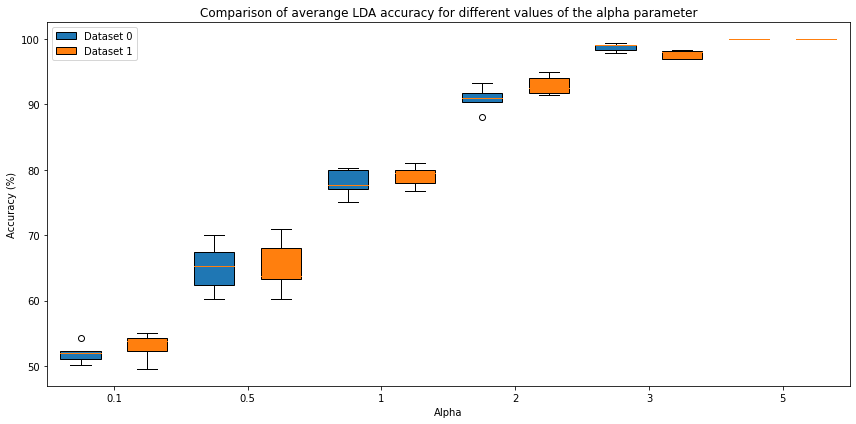

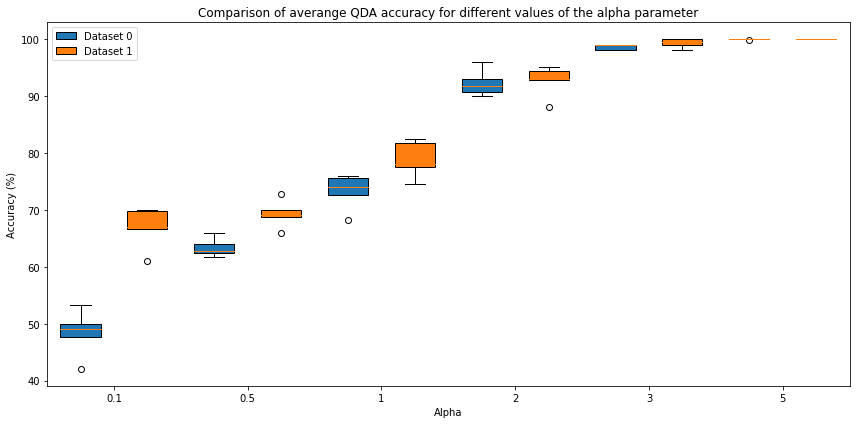

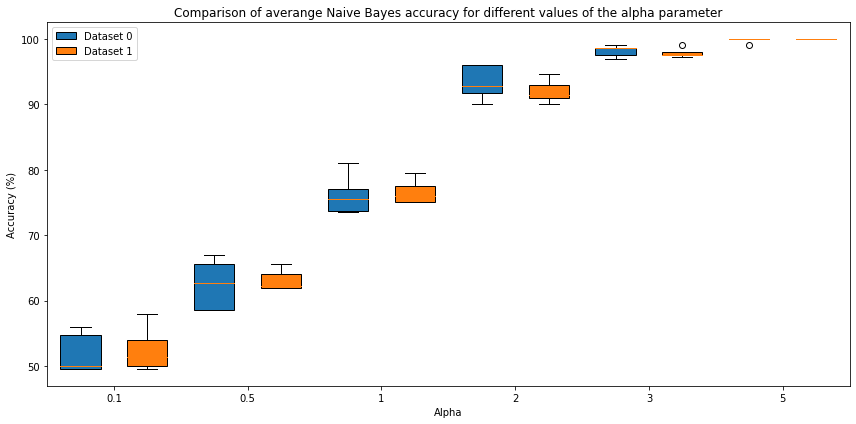

In [119]:
for model in models:
    results = {}
    for alpha in alpha_list:
        results[alpha] = experiment_model(
            model,
            prob, n, mean, alpha, variance, rho
            )
    draw_model_experiment(model, results)


As we can see, for each model, the higher the alpha value, the higher the accuracy.

Let's see how data sets vary depending on the alpha value


In [120]:
def draw(data1: np.array, data2: np.array, name: str) -> None:
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)

    y0 = data1[:, 0] == 0
    plt.scatter(
        data1[y0][:, 1],
        data1[y0][:, 2],
        color="red",
        label="Class 0 (Dataset 0)"
    )

    y1 = data1[:, 0] == 1
    plt.scatter(
        data1[y1][:, 1],
        data1[y1][:, 2],
        color="blue",
        label="Class 1 (Dataset 0)"
    )

    plt.legend()
    plt.xlabel("Feature 1 value")
    plt.ylabel("Feature 2 value")
    plt.title("Data distribution for dataset 0")

    plt.subplot(1, 2, 2)

    y0 = data2[:, 0] == 0
    plt.scatter(
        data2[y0][:, 1],
        data2[y0][:, 2],
        color="green",
        label="Class 0 (Dataset 1)"
    )

    y1 = data2[:, 0] == 1
    plt.scatter(
        data2[y1][:, 1],
        data2[y1][:, 2],
        color="orange",
        label="Class 1 (Dataset 1)"
    )

    plt.legend()
    plt.xlabel("Feature 1 value")
    plt.ylabel("Feature 2 value")
    plt.title("Data distribution for dataset 1")

    plt.suptitle(f"Comparison of data distributions with alpha = {alpha}")
    plt.savefig(f"plots/{name}.jpg")
    plt.show()


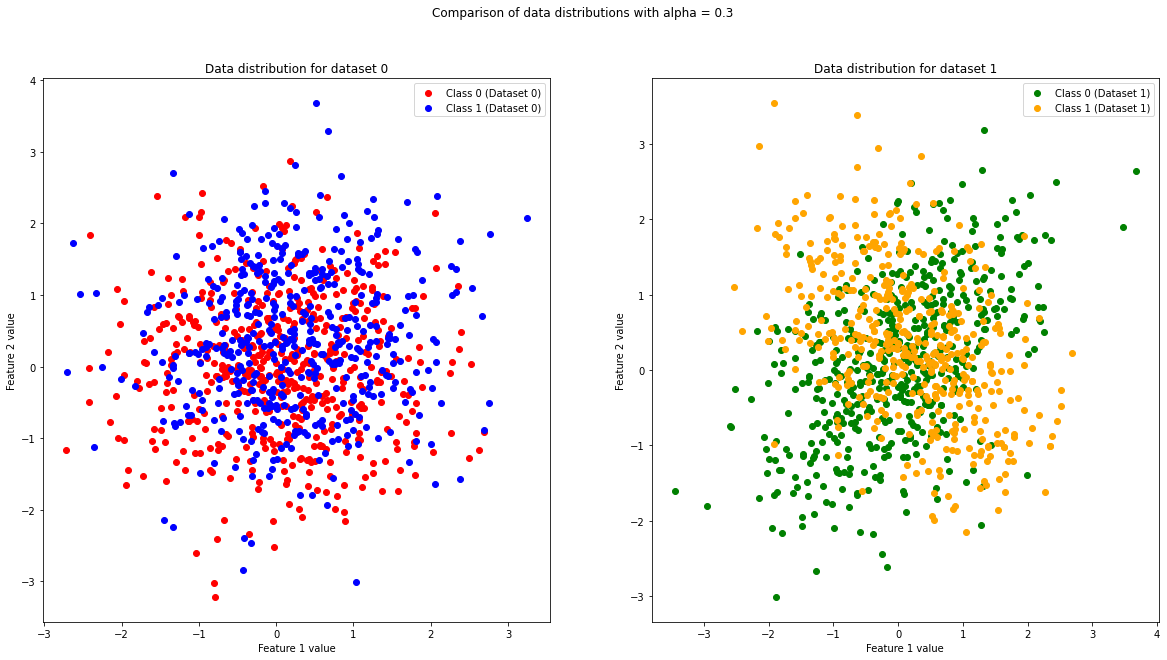

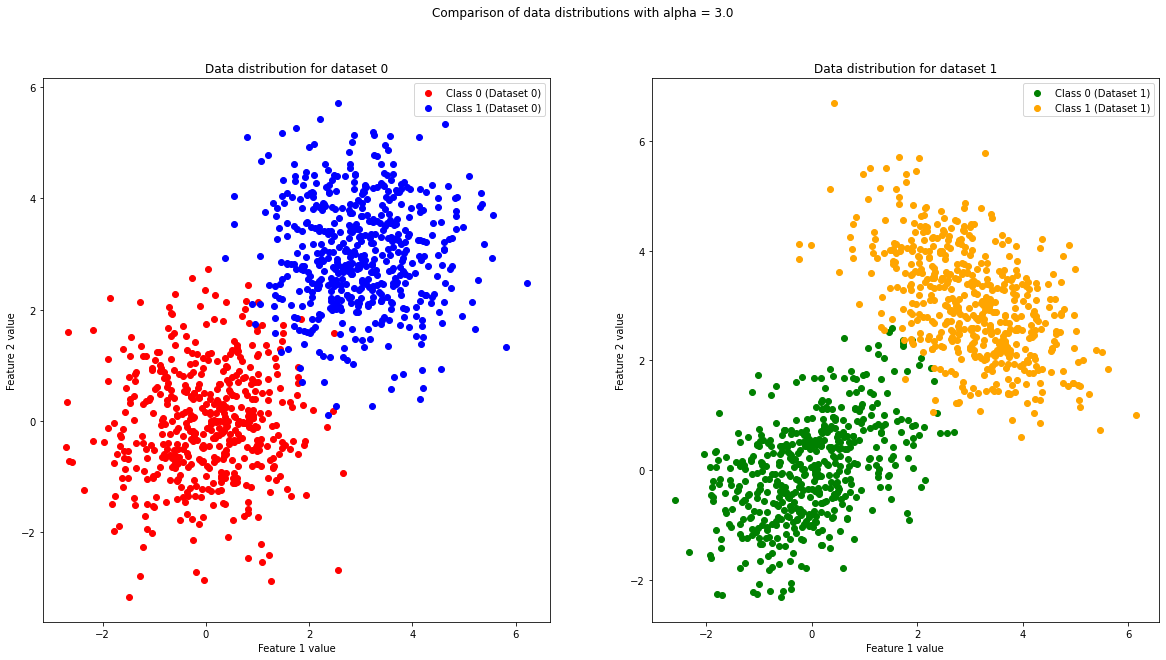

In [121]:
for alpha in (0.3, 3.0):
    y = generate_y(prob, n)
    data1 = generate_data_1(y, mean, alpha, variance)
    data2 = generate_data_2(y, rho, alpha)

    draw(data1, data2, f"data_distribution_alpha_{alpha}")


As we can see, a higher alpha value means a greater distance between the sets, so it is easier to detect the correct class.
